In [1]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(ggplot2)
    library(palmerpenguins)
    library(ggthemes)
})

# DataFrames & Visualizing data with plots

## Overview of the datastructure and its content
- Use the function `glimpse()`

In [2]:
glimpse(penguins)

Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel~
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse~
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1, ~
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1, ~
$ flipper_length_mm <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 186~
$ body_mass_g       <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 3475, ~
$ sex               <fct> male, female, female, NA, female, male, female, male~
$ year              <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007~


## Sorting
- Use the function `arrange()`

In [3]:
penguins %>%
    arrange(desc(body_mass_g)) %>%
    slice_head(n = 3)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Gentoo,Biscoe,49.2,15.2,221,6300,male,2007
Gentoo,Biscoe,59.6,17.0,230,6050,male,2007
Gentoo,Biscoe,51.1,16.3,220,6000,male,2008


## Filtering
- Use the function `filter()` combined with condition(s)

In [4]:
# Filter out all males and body masses less than 3300
penguins %>%
    filter(sex != "male" & body_mass_g > 3300) %>%
    slice_head(n = 3)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,38.9,17.8,181,3625,female,2007


In [5]:
# Filtering multiple values
# Filter species not equal to Chinstrap, Gentoo
unique(penguins$species)
Adelie <- penguins %>% 
    filter(! species %in% c("Chinstrap", "Gentoo"))
unique(Adelie$species)

[1] Adelie    Gentoo    Chinstrap
Levels: Adelie Chinstrap Gentoo

[1] Adelie
Levels: Adelie Chinstrap Gentoo

## Summarise, Mutating & Grouping
- Use `summarise()` when you want to create a new dataframe
- Use `mutate()` when you want to create a new variable (column)
- Combine with `group_by()` to aggregate the data.

In [6]:
# Group by sex and summarise the average body mass for male and female
penguins %>%
    select(sex, body_mass_g) %>%
    drop_na(sex) %>%
    group_by(sex) %>%
    summarise(
        avg_body_mass_sex = mean(body_mass_g, na.rm = TRUE),
        .groups = "keep" # keep the data grouped
    )

# create a new variable : BILL AREA
penguins <- penguins %>%
    drop_na(bill_length_mm, bill_depth_mm) %>%
    mutate(
        bill_area_mm2 = bill_length_mm * bill_depth_mm
    )

# group by species and display species with greatest average bill_area
penguins %>%
    group_by(species) %>%
    summarise(
        avg_bill_area_mm2 = mean(bill_area_mm2, na.rm = TRUE),
        .groups = "keep"
    ) %>%
    arrange(desc(avg_bill_area_mm2))

sex,avg_body_mass_sex
<fct>,<dbl>
female,3862.273
male,4545.685


species,avg_bill_area_mm2
<fct>,<dbl>
Chinstrap,901.9891
Gentoo,713.6533
Adelie,712.9409


## Data Visualization: Barplots

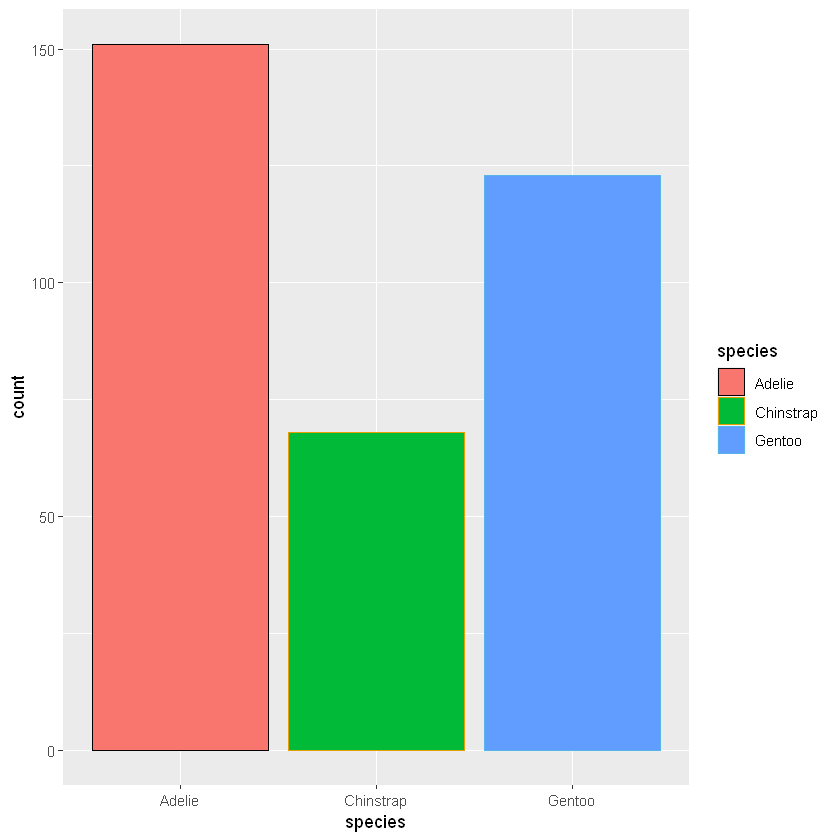

In [7]:
ggplot(
    data = penguins,
    mapping = aes(x = species, color = species)
) +
    geom_bar(mapping = aes(fill = species)) +
    scale_color_colorblind()

## Data Visualization: Scatterplots
- Use `geom_point()` to create a scatterplot
- Use `facet_wrap(~variable)` when you want to create subplots based on a categorical `variable`

`geom_smooth()` using formula = 'y ~ x'


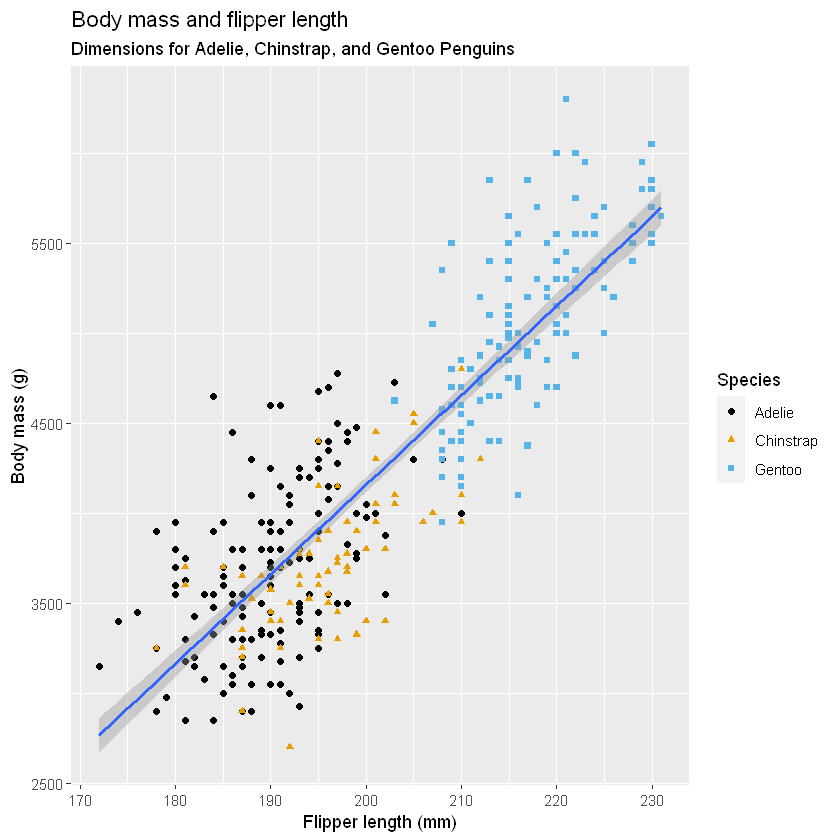

In [8]:
ggplot(
    data = penguins,
    mapping = aes(x = flipper_length_mm, y = body_mass_g)
) +
    # add shape and color to species
    geom_point(mapping = aes(color = species, shape = species)) +
    # add a fitted line
    geom_smooth(method = "lm") +
    labs(
        title = "Body mass and flipper length",
        subtitle = "Dimensions for Adelie, Chinstrap, and Gentoo Penguins",
        x = "Flipper length (mm)", y = "Body mass (g)",
        color = "Species", shape = "Species"
    ) +
    scale_color_colorblind()

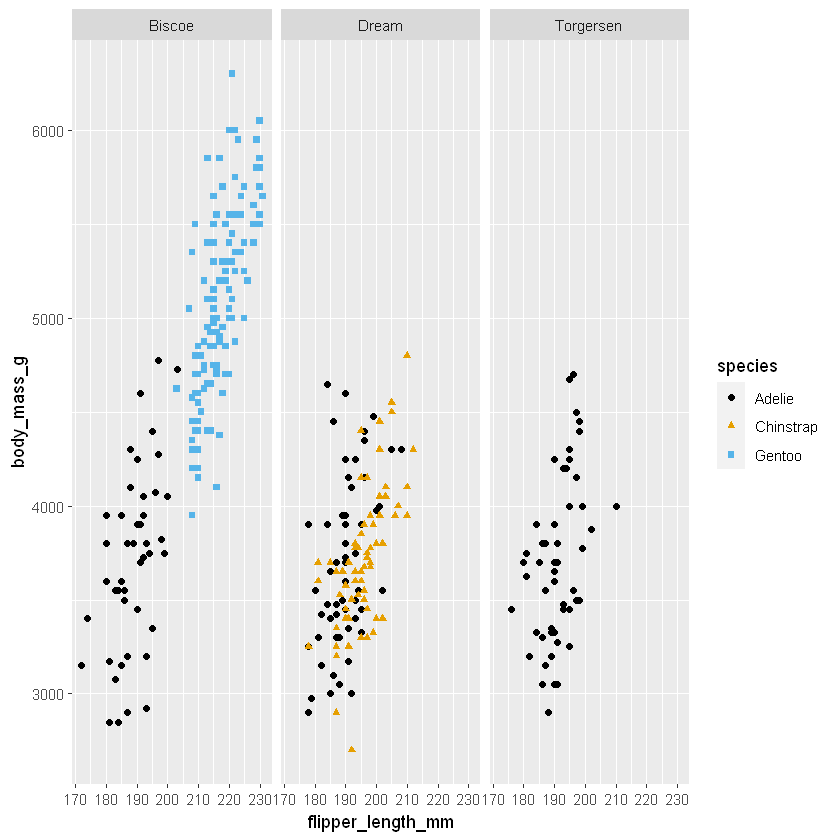

In [9]:
ggplot(
    data = penguins,
    mapping = aes(x = flipper_length_mm, y = body_mass_g)
) +
    geom_point(mapping = aes(color = species, shape = species)) +
    facet_wrap(~island) +
    scale_color_colorblind()